In [1]:
import numpy as np
from matplotlib import pyplot as plt
import heapq
from sklearn.datasets import load_digits


In [2]:
def knn(query, k, points, labels, distance=np.linalg.norm):
    distances = [-np.linalg.norm(query-p, 2) for p in points]
    heap = []
    for i, d in enumerate(distances):
        if len(heap) < k:
            heapq.heappush(heap, (d, i))
        elif d > heap[0][0]:
            heapq.heappushpop(heap, (d, i))
    return most_common([labels[h[1]] for h in heap])
    
def most_common(arr):
    freq = {}
    for a in arr:
        if a in freq:
            freq[a] += 1
        else:
            freq[a] = 1
    maxFreq = 0
    maxA = arr[0]
    for a, f in freq.items():
        if f > maxFreq:
            maxFreq = f
            maxA = a
    return maxA

# Training Dataset

In [3]:
images, labels = load_digits(2, return_X_y=True)
images = images.T

# Labeled training set
training_images = images[:, :300]
training_labels = labels[:300]

# Labeled test set
test_images = images[:, 300:]
test_labels = labels[300:]


# kNN Classification Using 2D Features

In [4]:
U, Sigma, V = np.linalg.svd(training_images)


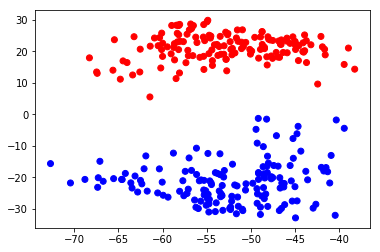

In [5]:
U2 = U[:, :2]
training_images_pca = U2.T @ training_images

plt.figure()
plt.scatter(*training_images_pca, c=['b' if l == 1 else 'r' for l in training_labels])
plt.show()

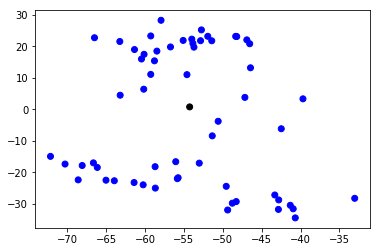

In [6]:
test_images_pca = U2.T @ test_images
pred_labels = [knn(p, 5, training_images_pca.T, training_labels) for p in test_images_pca.T]

plt.figure()
plt.scatter(*test_images_pca, c=['b' if p == l else 'k' for p, l in zip(pred_labels, test_labels)])
plt.show()

In [7]:
classification_error = sum((0 if p == l else 1 for p, l in zip(pred_labels, test_labels))) / len(pred_labels)
print("The classification error is {}".format(classification_error))

The classification error is 0.016666666666666666


# kNN Classification Using Higher Dimensional Features

In [8]:
cumsum = 0
min_r = 0
Sigma /= sum(Sigma)
for i, s in enumerate(Sigma):
    cumsum += s
    if cumsum > .95:
        min_r = i
        break
print("The minimum r needed is {}".format(min_r))

The minimum r needed is 36


[0.0, 0.0, 0.0, 0.0, 0.0]


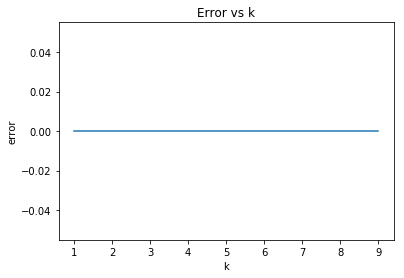

In [11]:
Ur = U[:, :min_r]

training_images_pca = Ur.T @ training_images
test_images_pca = Ur.T @ test_images

errors = []
for k in range(1, 10, 2):
    pred_labels = [knn(p, k, training_images_pca.T, training_labels) for p in test_images_pca.T]
    errors.append(sum((0 if p == l else 1 for p, l in zip(pred_labels, test_labels))) / len(pred_labels))
print(errors)

plt.figure()
plt.plot(list(range(1, 10, 2)), errors)
plt.xlabel('k')
plt.ylabel('error')
plt.title('Error vs k')
plt.show()